In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = pd.to_numeric(df['price'])

In [7]:
df['line_total'] = df['line_total'].str.replace('$', '')
df['line_total'] = pd.to_numeric(df['line_total'])

In [8]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [9]:
df[df.duplicated()].shape[0]

538

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()].shape[0]

0

In [12]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [13]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

#### Sanity check for value ranges and to check assumptions

In [16]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [17]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [18]:
df['line_total'] = df['price'] * df['quantity']

In [19]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [20]:
df = df.drop(df[df['line_total'] < 0].index)

In [21]:
df[df['line_total'] < 0].shape[0]

0

In [22]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [23]:
def get_category(x):
    return re.split(r'"(.*?)"', x)[1]

In [24]:
def get_name(x):
    return re.split(r'"(.*?)"', x)[2]

In [25]:
df['category'] = df['name'].apply(get_category)
df['name'] = df['name'].apply(get_name)

In [26]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [27]:
df['category'].value_counts()

ICE CREAM    13386
SORBET        5146
CONE          5127
BEVERAGE      2997
MISC           968
Name: category, dtype: int64

In [28]:
df['name'].value_counts()

 Mint Chip             1088
 Lemon                 1087
 Candied Bacon         1073
 Sugar Cone            1057
 Double Fudge Chunk    1053
 Rocky Road            1051
 Dark Chocolate        1048
 Cookie Cone           1045
 Raspberry             1044
 Dipped Waffle Cone    1033
 Maple Brown Sugar     1028
 Blood Orange          1027
 Iced Coffee           1024
 Brownie Cone          1023
 Wildberry             1022
 Dulce De Leche        1017
 Matcha                1011
 Vanilla Bean          1010
 Strawberry            1009
 Espresso              1002
 Watermelon             994
 Lychee                 994
 Earl Gray              993
 Peanut Fudge           983
 Tea                    971
 Waffle Cone            969
 Ice Cream Cake         968
Name: name, dtype: int64

#### Analysis, finally!

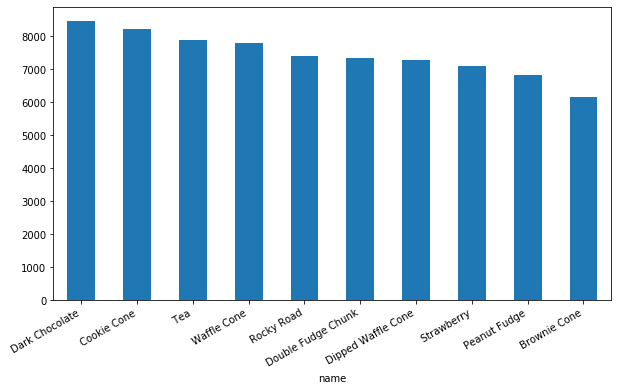

In [29]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()